# Text Pocessing and EDA

The objective of this notebook is to explore the corpus, clea the text and perform the EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections
import nltk
import seaborn as sns
import re
import textblob
import spacy
from nltk.tokenize.toktok import ToktokTokenizer

%matplotlib inline

In [2]:
# Read data
train = pd.read_csv('Library/train_df.csv')
test = pd.read_csv('Library/test_df.csv')

## Exploratory Data Analysis

### Train dataset

I start with the EDA of the train dataset. Afterwards, I will perform the same steps on the test dataset.

####         - Specify the number of comments under each category

First, let's figure out the number of rows under each category of toxicity.

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df1 = train[train.columns[2:]].melt()
df1 = df1[df1.value == 1]
df1.head()

,variable,value
6,toxic,1
12,toxic,1
16,toxic,1
42,toxic,1
43,toxic,1


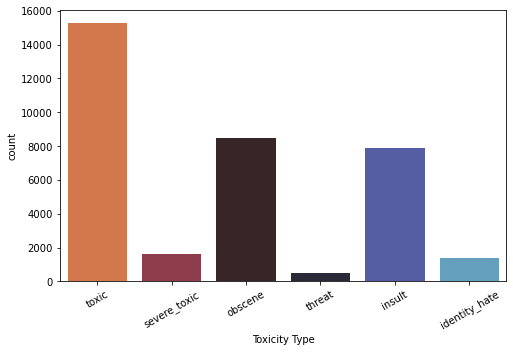

In [5]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='variable', data=df1, palette='icefire_r')
ax.set(xlabel='Toxicity Type')
ax.tick_params(axis='x', rotation=30)
plt.show()

Number of comments in each category (from the highest to the lowest) is as following: toxic, obscene, insult, severe toxic, identity hate and threat.

#### - Word Cloud

Now, I visualize the the text information for each category. A nice way to visualize the text information is using a word cloud.

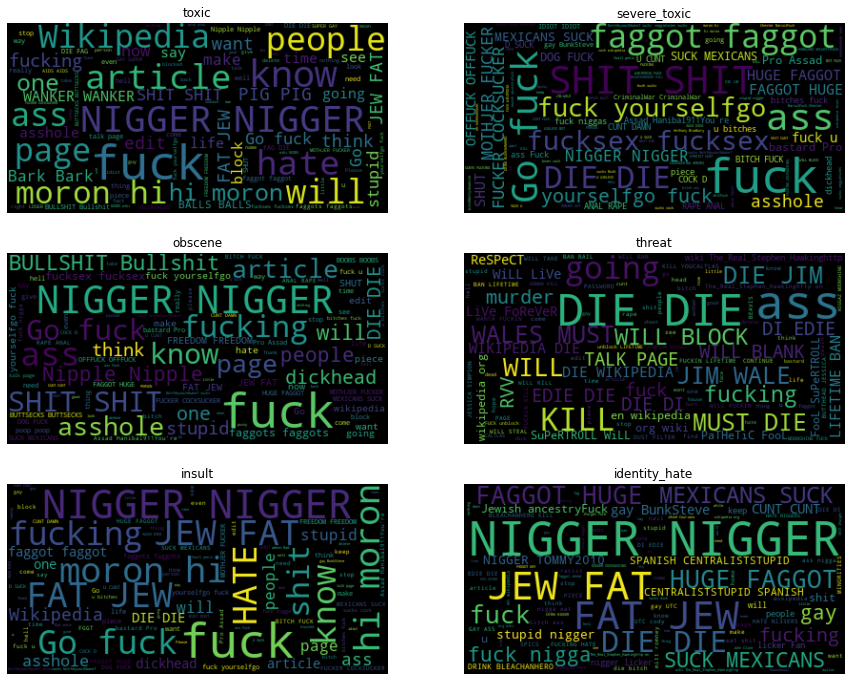

In [6]:
wc = WordCloud(max_font_size=50, max_words=100, background_color='black')

fig = plt.figure(figsize=(15,12))
i = 1
for col in train.columns[2:]:
    ax = fig.add_subplot(3, 2, i)
    text = ' '.join([t for t in train[train[col] == 1]['comment_text']])
    wordcloud = wc.generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.title(col)
    i += 1

The wordcloud representation shows that I need to perform text prepocessing. I need to remove unnecessary words, like punctutation, white spaces and stop words. Also, lemmatization (converting a word to its base form) is essential.

#### - Text Preprocessing

In this section, I define functions to perform text preprocessing and cleaning and test the functions, too.

In [7]:
# Removing special characters

def special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

train['comment_text'][:10].apply(special_characters)

0    Explanation\nWhy the edits made under my usern...
1    Daww He matches this background colour Im seem...
2    Hey man Im really not trying to edit war Its j...
3    \nMore\nI cant make any real suggestions on im...
4    You sir are my hero Any chance you remember wh...
5    \n\nCongratulations from me as well use the to...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [8]:
# Correcting the mispelled words

def correct_word_spelling(text):
    text = textblob.TextBlob(text)
    text = text.correct()
    return str(text)

correct_word_spelling(train['comment_text'][0])

"Explanation\nWhy the edit made under my surname Hardcore Metallic An were reverted? They weren't vandalisms, just closure on some was after I voted at New Work Polls FAC. And please don't remove the temple from the talk page since I'm retired now.89.205.38.27"

In [9]:
# Removing meaningless words

nltk.download('words')

def remove_meaningless_words(text):
    words = set(nltk.corpus.words.words())
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) 
                    if w.lower() in words or not w.isalpha())
    return text

remove_meaningless_words(train['comment_text'][0])

[nltk_data] Downloading package words to /Users/zori/nltk_data...
[nltk_data]   Package words is already up-to-date!


"Explanation Why the made under my Fan were ? They ' t , just closure on some GAs after I at New York . And please don ' t remove the template from the talk page since I ' m retired now . 89 . 205 . 38 . 27"

In [10]:
# Lemmatization

nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

train['comment_text'][:5].apply(lemmatize_text)


0    Explanation \n why the edit make under my user...
1    D'aww ! he match this background colour I be s...
2    hey man , I be really not try to edit war . it...
3    " \n More \n I can not make any real suggestio...
4    you , sir , be my hero . any chance you rememb...
Name: comment_text, dtype: object

In [11]:
# Remove stop words

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    text = ' '.join([token for token in tokens if token.lower() not in stopwords])
    return text

remove_stopwords(train['comment_text'][0])

"Explanation edits made username Hardcore Metallica Fan reverted ? ' vandalisms , closure GAs voted New York Dolls FAC. please ' remove template talk page since ' retired now.89.205.38.27"

In [12]:
# Case conversion

def text_conversion(text, case = 'lower'):
    if case == 'lower':
        return text.lower()
    elif case == 'upper':
        return text.upper()
    elif case == 'title':
        return text.title()
    else:
        return text
    
text_conversion(train['comment_text'][0], case='lower')

"explanation\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27"

In [13]:
# Corpus normalization pipeline: let's bring it all together and build a text normalizer

def normalize_corpus(corpus, special_char=True, word_spelling=True, meaningless_words=True, lemmatization=True, 
                     stopwords=True, case_conversion=True):
    normalized_corpus = []
    
    for doc in corpus:
        if special_char:
            doc = special_characters(doc, remove_digits=True)
        if lemmatization:
            doc = lemmatize_text(doc)
        if word_spelling:
            doc = correct_word_spelling(doc)
        if meaningless_words:
            doc = remove_meaningless_words(doc)
        if stopwords:
            doc = remove_stopwords(doc)
        if case_conversion:
            doc = text_conversion(doc, case='lower')
        
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [14]:
import time

starttime = time.time()

for i in range(0, len(train), 20000):
    comment_df = train['comment_text'][i:i+20000]
    train['clean_text'] = comment_df.apply(lambda x: normalize_corpus(x, special_char=True, 
                                    word_spelling=True, meaningless_words=True, lemmatization=True, 
                                    stopwords=True, case_conversion=True))
    
    print(i)
    
    time.sleep(2)
    
print('The text preprocessing took {} seconds'.format(time.time() - starttime))

KeyboardInterrupt: 

In [ ]:
train.tail(50)